<a href="https://colab.research.google.com/github/maheshyadav007/research/blob/main/circle_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import torch 
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

In [69]:
x1 = np.random.uniform(low = -1, high = 1, size = (500,1))
x2 = np.random.uniform(low = -1, high = 1, size = (500,1))

In [70]:
X = np.concatenate((x1, x2), axis = 1)
X = X/np.sqrt(x1**2 + x2**2)

In [71]:
Y = [ [np.sin(np.arcsin(i))] if i > 0 else [np.sin(10*np.arcsin(i))]  for i in X[:,1] ]
Y = np.array(Y)

In [72]:
n_data = len(Y)

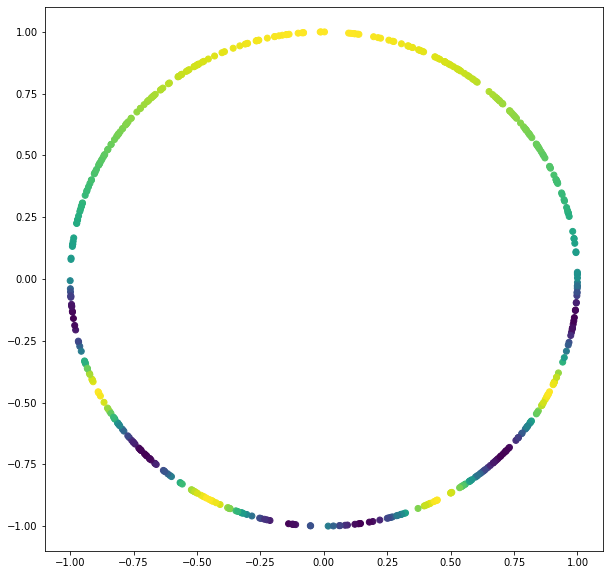

In [73]:
plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], c = Y)
plt.savefig("Input Data")

In [74]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [75]:
class CustomDataset(Dataset):
    def __init__(self, X, Y):
        self.size = len(Y)
        self.x = torch.tensor(X)
        self.y = torch.tensor(Y)

    def __len__(self):
        return (self.size)

    def __getitem__(self, idx):
        #print(self.x[idx].shape,self.y[idx].shape )
        return self.x[idx].float(), self.y[idx].float()


In [76]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    correct = 0
    for batch, (x,y) in enumerate(dataloader):
        X, y = x.to(device), y.to(device)
        pred, _ = model(X.float())
        loss = loss_fn(pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch%16 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f} Batch:{batch} [{current:>5d}/{size:>5d}]")
    return pred

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred , out = model(X.float())
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

    return pred, out

In [77]:
class NeuralNet(nn.Module):
  def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(2, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 32)
        self.fc4 = nn.Linear(32, 1)

  def forward(self, x, batch = None):
        x = self.fc1(x)
        o1 = torch.relu(x)
        x = self.fc2(o1)
        o2 = torch.relu(x)
        x = self.fc3(o2)
        o3 = torch.relu(x)
        x = self.fc4(o3)
        return x , [o1, o2, o3]

In [78]:
batch_size = 16
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42, shuffle = True)

train_dataloader = DataLoader(CustomDataset(X_train, y_train), batch_size = batch_size, shuffle = True)
test_dataloader = DataLoader(CustomDataset(X_test, y_test), batch_size = batch_size, shuffle = True)

In [79]:
#sorted_arg = np.argsort(X[:, 0])
sorted_arg = np.argsort(np.arctan2(X[:,1],X[:,0])*180/np.pi)
X_sorted = X[sorted_arg]
Y_sorted = Y[sorted_arg]

batch_size = len(Y)
dataloader = DataLoader(CustomDataset(X_sorted, Y_sorted), batch_size = batch_size, shuffle = False)


In [123]:
model = NeuralNet().to(device)
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = 3e-2) 

In [133]:
epochs = 500
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    pred = train(train_dataloader,model, loss_fn, optimizer)
    test(test_dataloader,model, loss_fn)
print("Done!")


Epoch 1
-------------------------------
loss: 0.033325 Batch:0 [    0/  450]
loss: 0.000985 Batch:16 [  256/  450]
Test Error: 
 Accuracy: 0.0%, Avg loss: 0.065485 

Epoch 2
-------------------------------
loss: 0.043054 Batch:0 [    0/  450]
loss: 0.002631 Batch:16 [  256/  450]
Test Error: 
 Accuracy: 0.0%, Avg loss: 0.003507 

Epoch 3
-------------------------------
loss: 0.002670 Batch:0 [    0/  450]
loss: 0.000747 Batch:16 [  256/  450]
Test Error: 
 Accuracy: 0.0%, Avg loss: 0.002821 

Epoch 4
-------------------------------
loss: 0.012435 Batch:0 [    0/  450]
loss: 0.036776 Batch:16 [  256/  450]
Test Error: 
 Accuracy: 0.0%, Avg loss: 0.032002 

Epoch 5
-------------------------------
loss: 0.032502 Batch:0 [    0/  450]
loss: 0.005092 Batch:16 [  256/  450]
Test Error: 
 Accuracy: 0.0%, Avg loss: 0.020770 

Epoch 6
-------------------------------
loss: 0.012213 Batch:0 [    0/  450]
loss: 0.001164 Batch:16 [  256/  450]
Test Error: 
 Accuracy: 0.0%, Avg loss: 0.018223 

Epoc

In [82]:
#np.sort(np.arctan2(X[:,1],X[:,0])*180/np.pi)

In [134]:
  prediction, out = test(dataloader,model, loss_fn)

Test Error: 
 Accuracy: 0.0%, Avg loss: 0.005251 



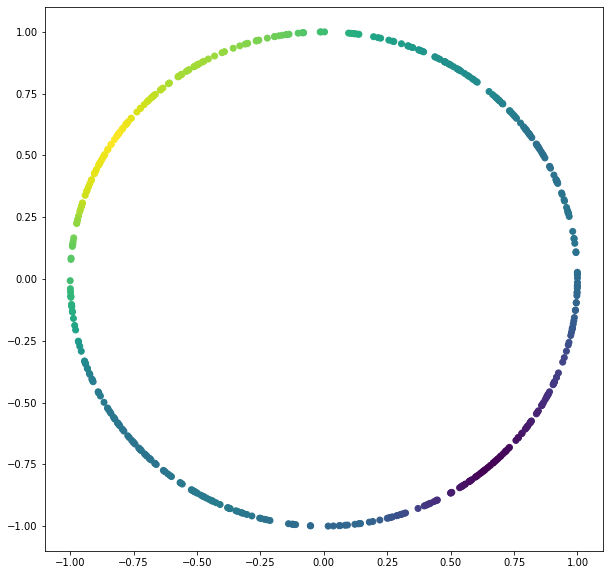

In [126]:
plt.figure(figsize=(10,10))
plt.scatter(X_sorted[:,0], X_sorted[:,1], c = prediction.to("cpu"))
plt.savefig("regenerated_random")

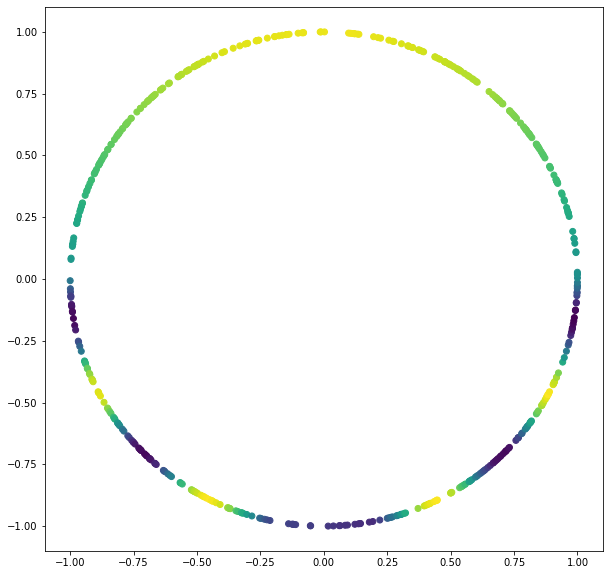

In [135]:
plt.figure(figsize=(10,10))
plt.scatter(X_sorted[:,0], X_sorted[:,1], c = prediction.to("cpu"))
plt.savefig("regenerated_learnt")

In [136]:
temp = np.zeros((3, n_data, 32))
temp[0] = out[0].to("cpu")
temp[1] = out[1].to("cpu")
temp[2] = out[2].to("cpu")

out = temp
out = np.sign(out)

lambda_matrix = np.zeros(shape = (n_data, n_data))

for i in range(n_data):
  for j in range(n_data):
    lambda_matrix[i][j] = np.prod(np.sum(np.multiply(out[:,i,:], out[:,j,:]), axis = 1))

K1 = np.matmul(out[0],out[0].T)
K2 =  np.matmul(out[1],out[1].T)
K3 =  np.matmul(out[2],out[2].T)

lamb =  np.multiply(np.multiply(K1,K2), K3)

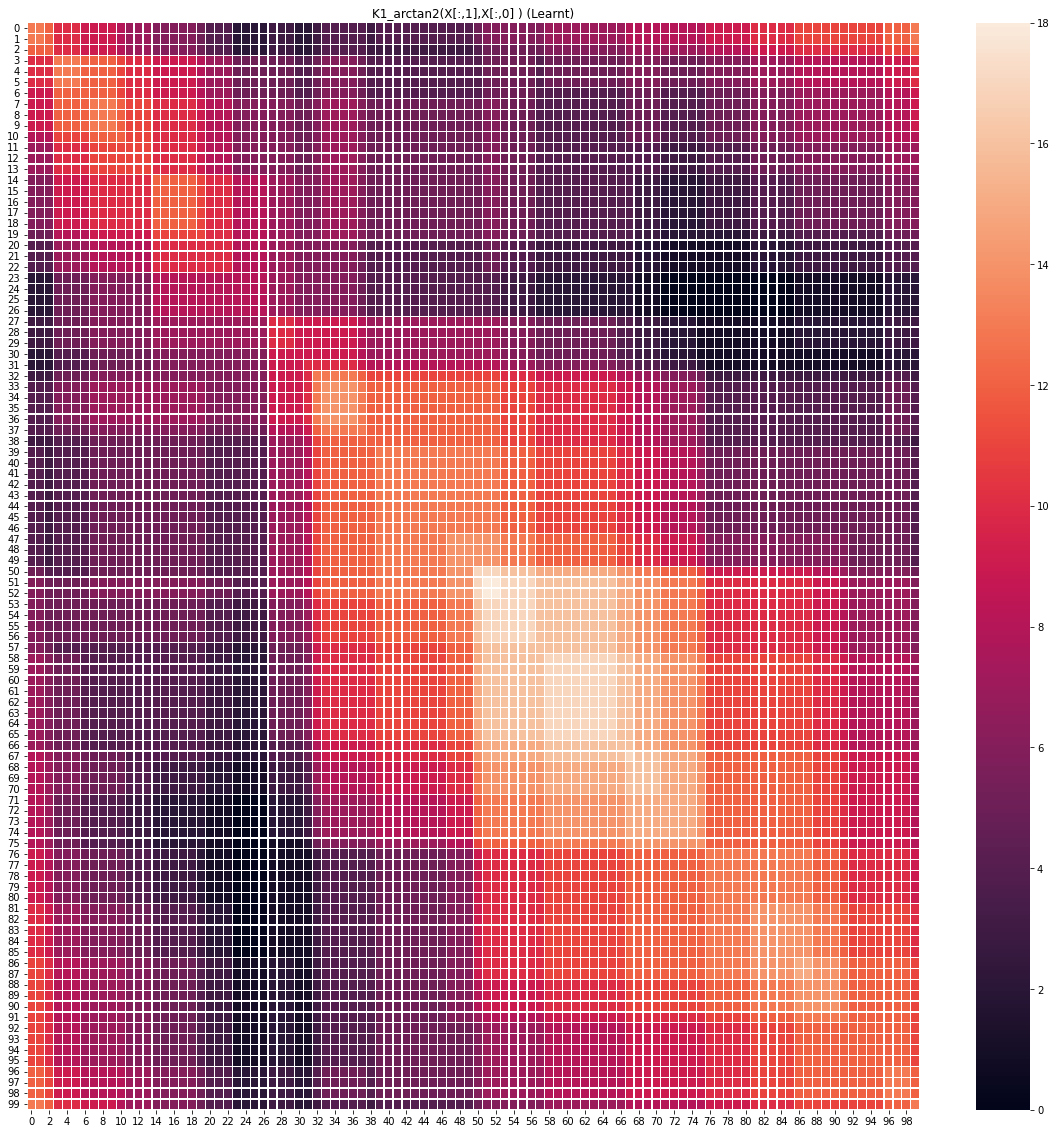

In [137]:
plt.figure(figsize = (20,20))
ax = sns.heatmap(K1[0:500:5,0:500:5], linewidth=.2)
plt.title('K1_arctan2(X[:,1],X[:,0] ) (Learnt)')
plt.savefig("K1_arctan2(X[:,1],X[:,0] )(Learnt)")
plt.show()

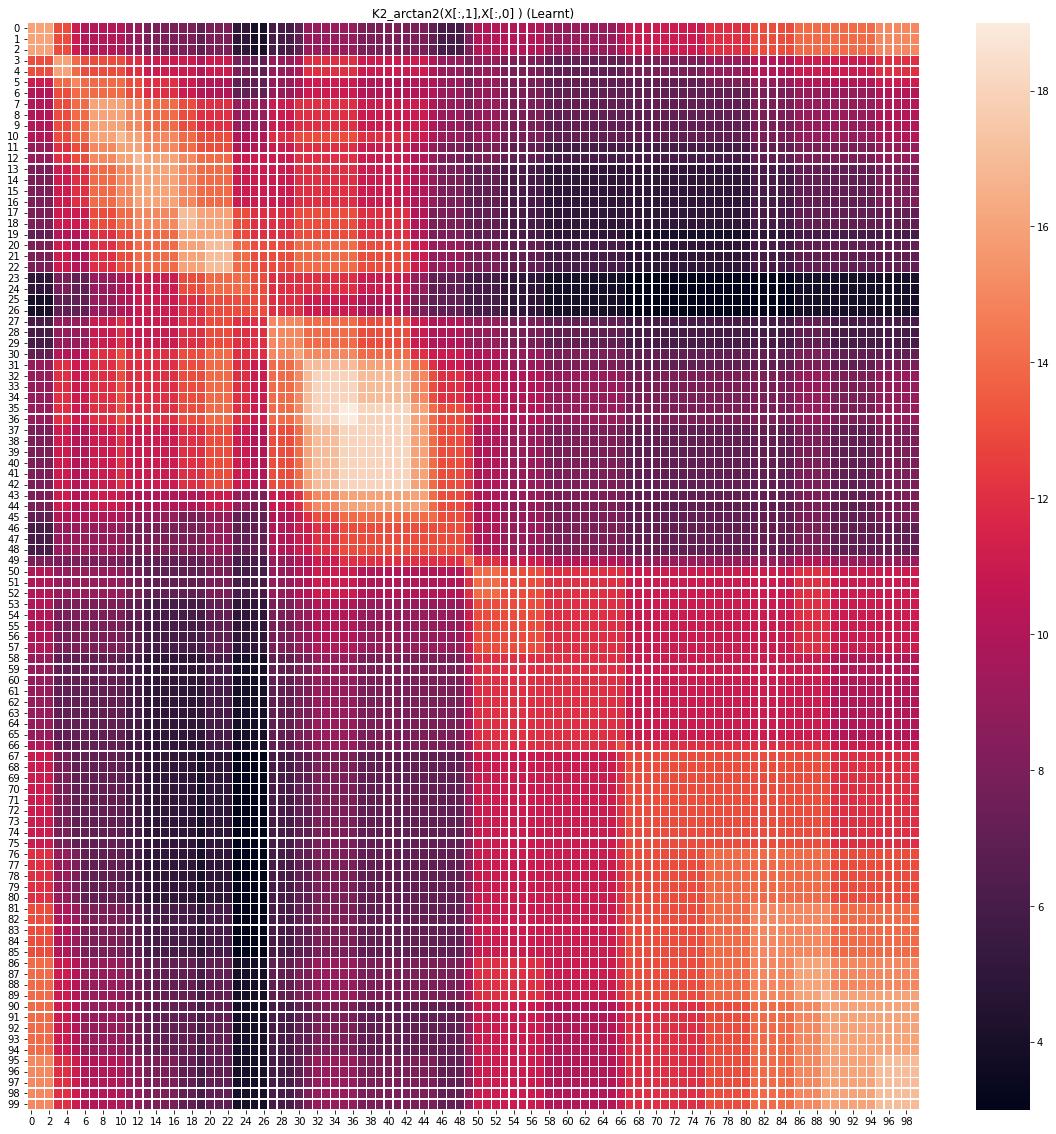

In [138]:
plt.figure(figsize = (20,20))
ax = sns.heatmap(K2[0:500:5,0:500:5], linewidth=.2)
plt.title('K2_arctan2(X[:,1],X[:,0] ) (Learnt)')
plt.savefig("K2_arctan2(X[:,1],X[:,0] )(Learnt)")
plt.show()

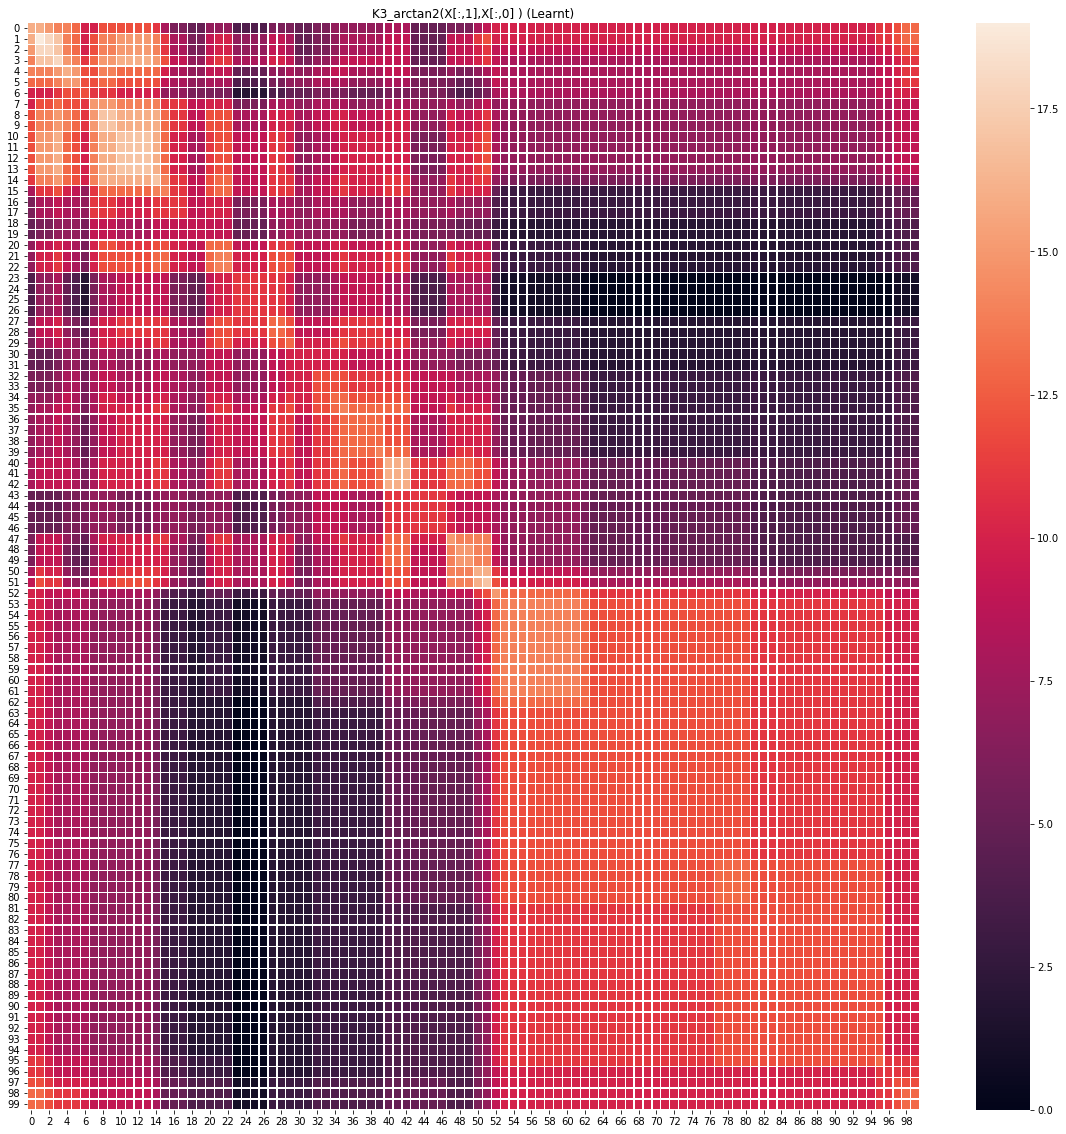

In [139]:
plt.figure(figsize = (20,20))
ax = sns.heatmap(K3[0:500:5,0:500:5], linewidth=.2)
plt.title('K3_arctan2(X[:,1],X[:,0] ) (Learnt)')
plt.savefig("K3_arctan2(X[:,1],X[:,0] )(Learnt)")
plt.show()

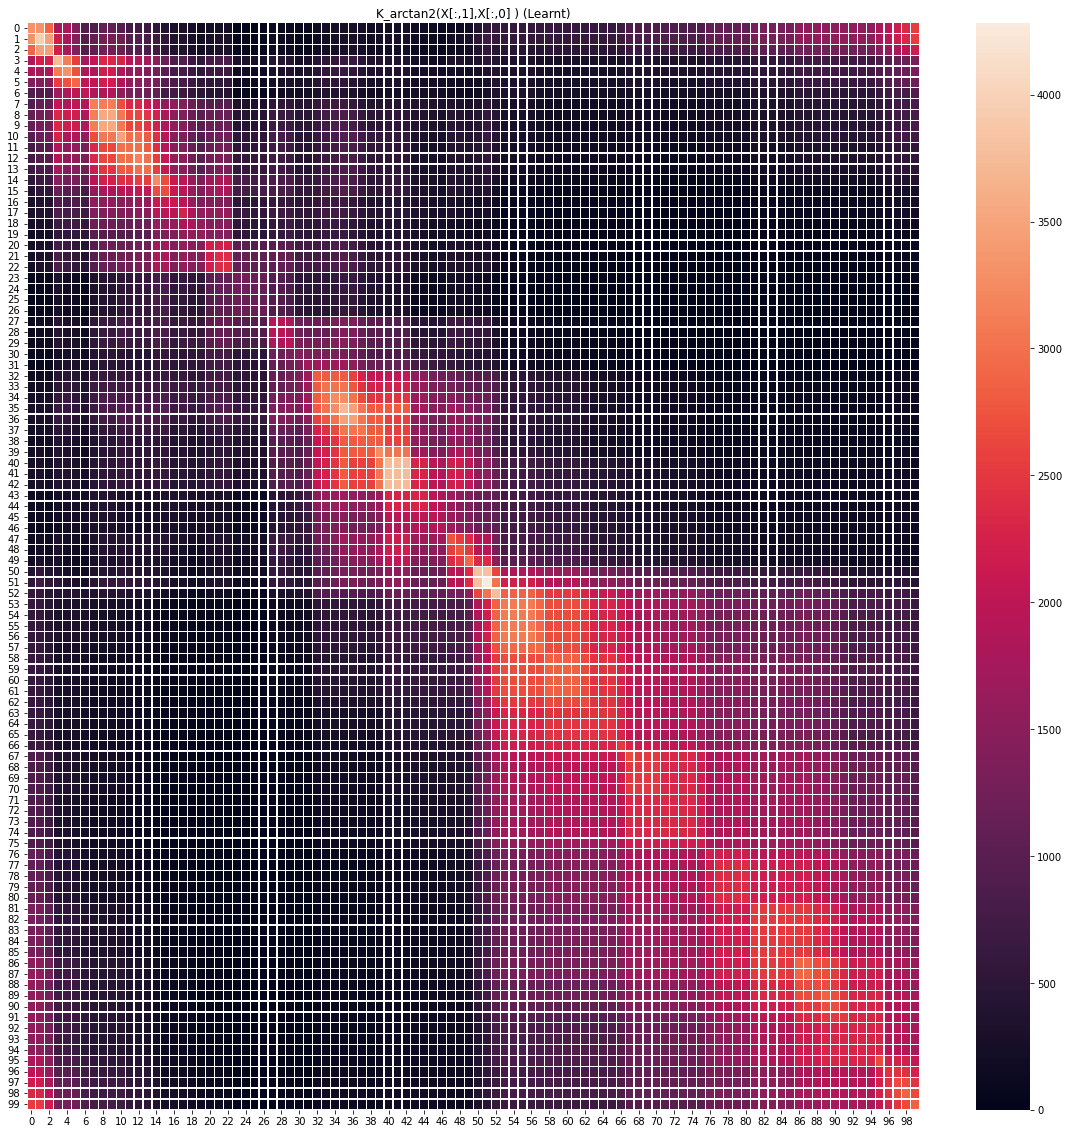

In [140]:
plt.figure(figsize = (20,20))
ax = sns.heatmap(lambda_matrix[0:500:5,0:500:5], linewidth=.2)
plt.title('K_arctan2(X[:,1],X[:,0] ) (Learnt)')
plt.savefig("K_arctan2(X[:,1],X[:,0] )(Learnt)")
plt.show()

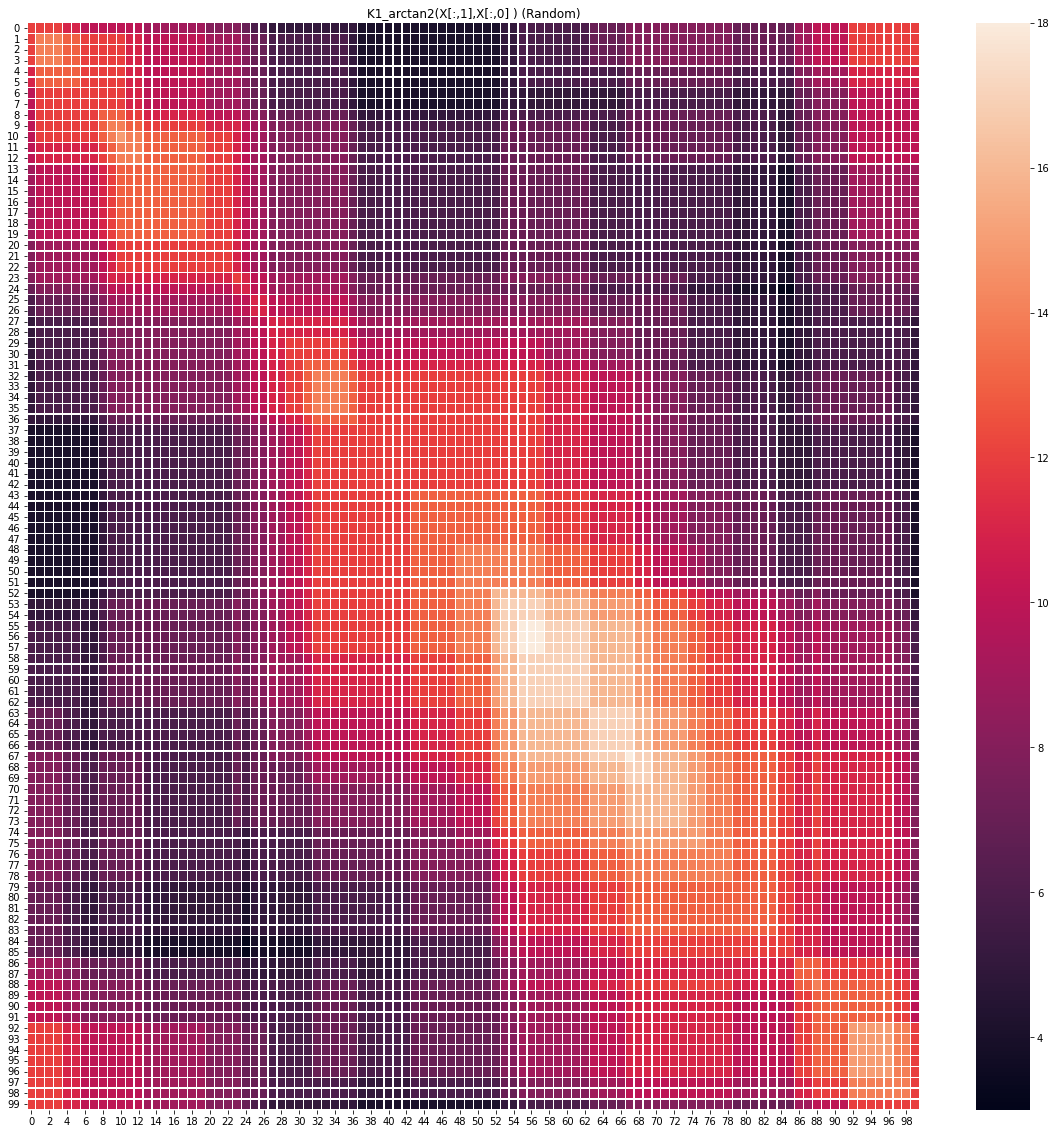

In [128]:
plt.figure(figsize = (20,20))
ax = sns.heatmap(K1[0:500:5,0:500:5], linewidth=.2)
plt.title('K1_arctan2(X[:,1],X[:,0] ) (Random)')
plt.savefig("K1_arctan2(X[:,1],X[:,0] )(Random)")
plt.show()

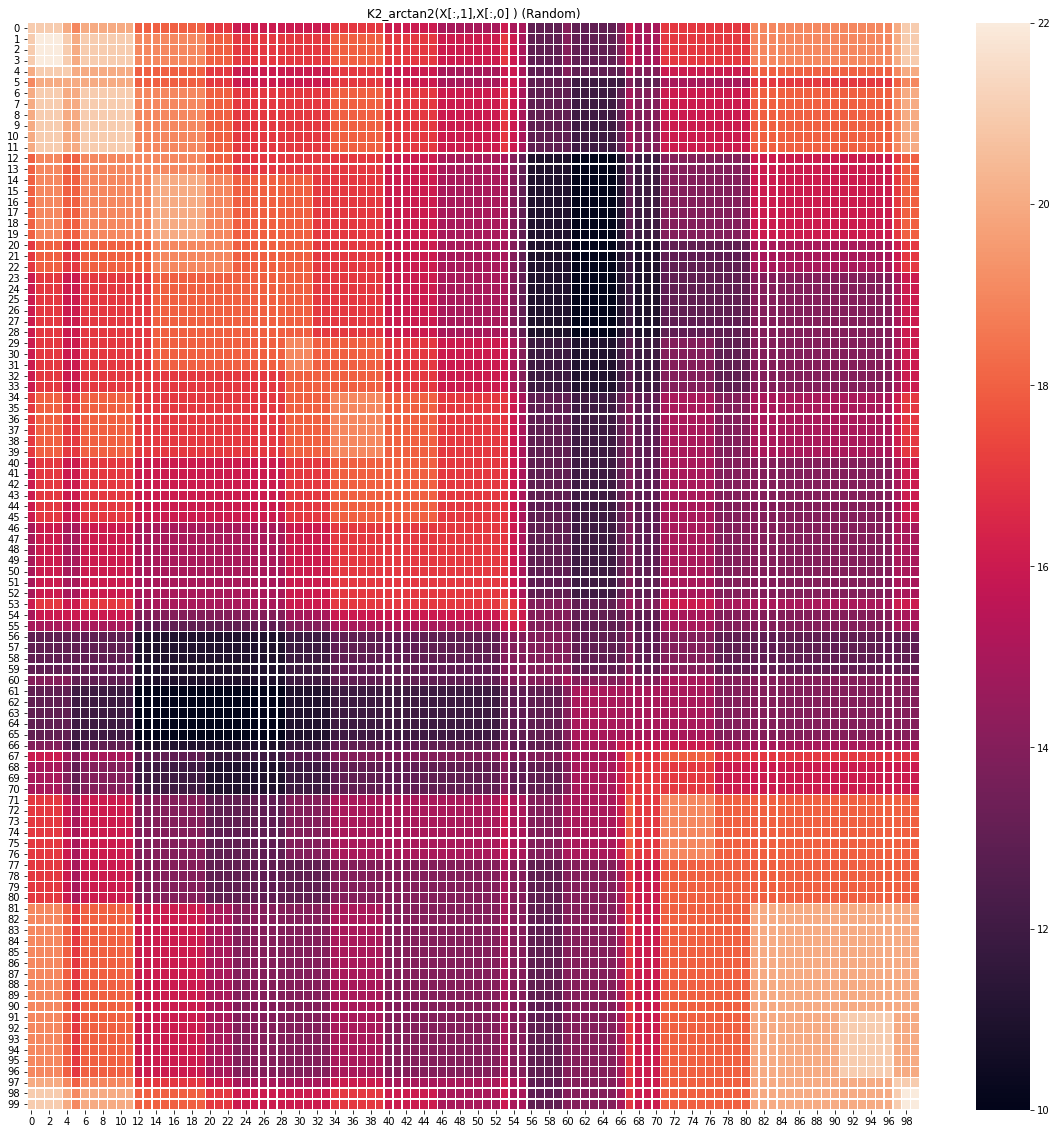

In [129]:
plt.figure(figsize = (20,20))
ax = sns.heatmap(K2[0:500:5,0:500:5], linewidth=.2)
plt.title('K2_arctan2(X[:,1],X[:,0] ) (Random)')
plt.savefig("K2_arctan2(X[:,1],X[:,0] )(Random)")
plt.show()

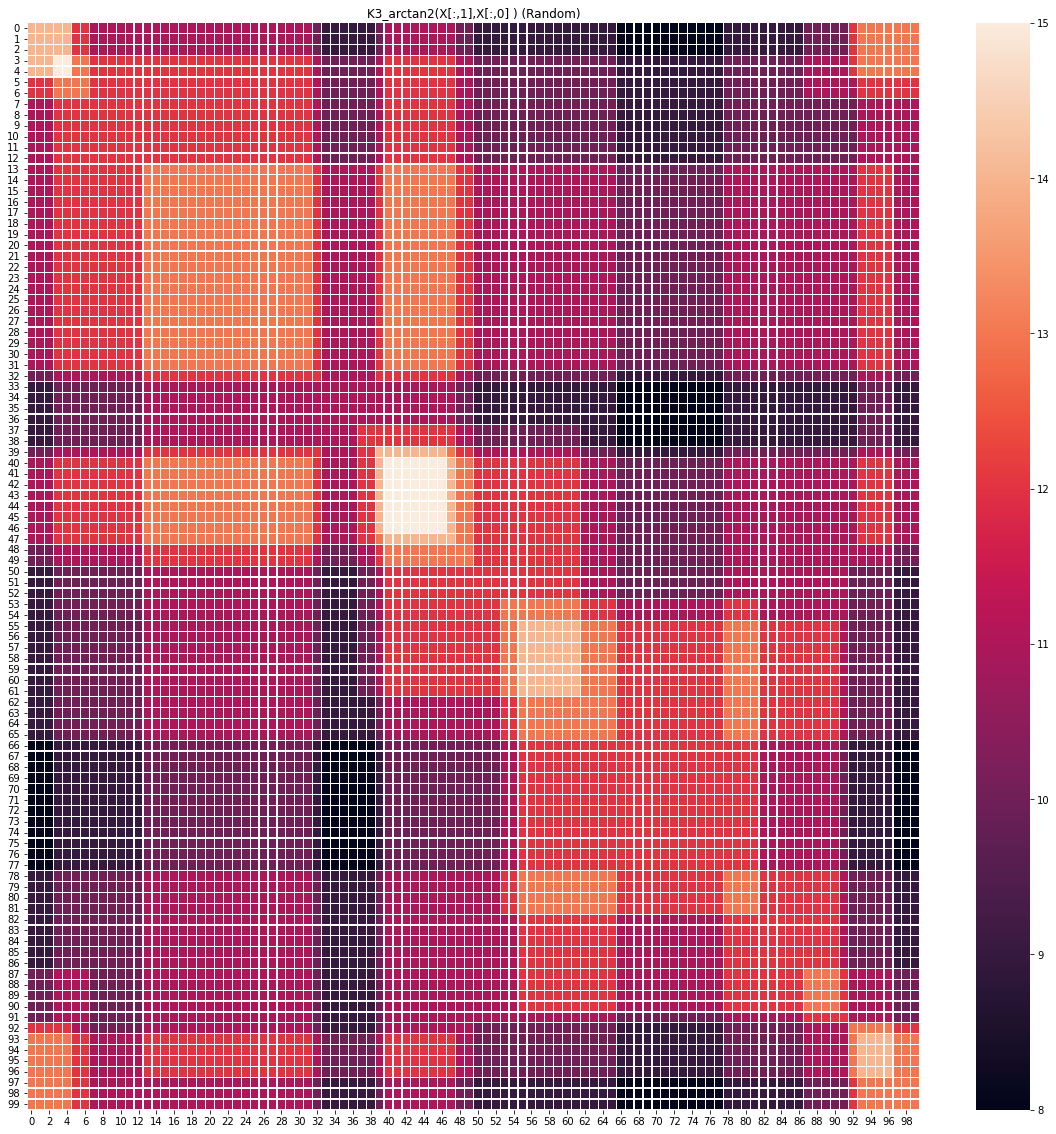

In [130]:
plt.figure(figsize = (20,20))
ax = sns.heatmap(K3[0:500:5,0:500:5], linewidth=.2)
plt.title('K3_arctan2(X[:,1],X[:,0] ) (Random)')
plt.savefig("K3_arctan2(X[:,1],X[:,0] )(Random)")
plt.show()

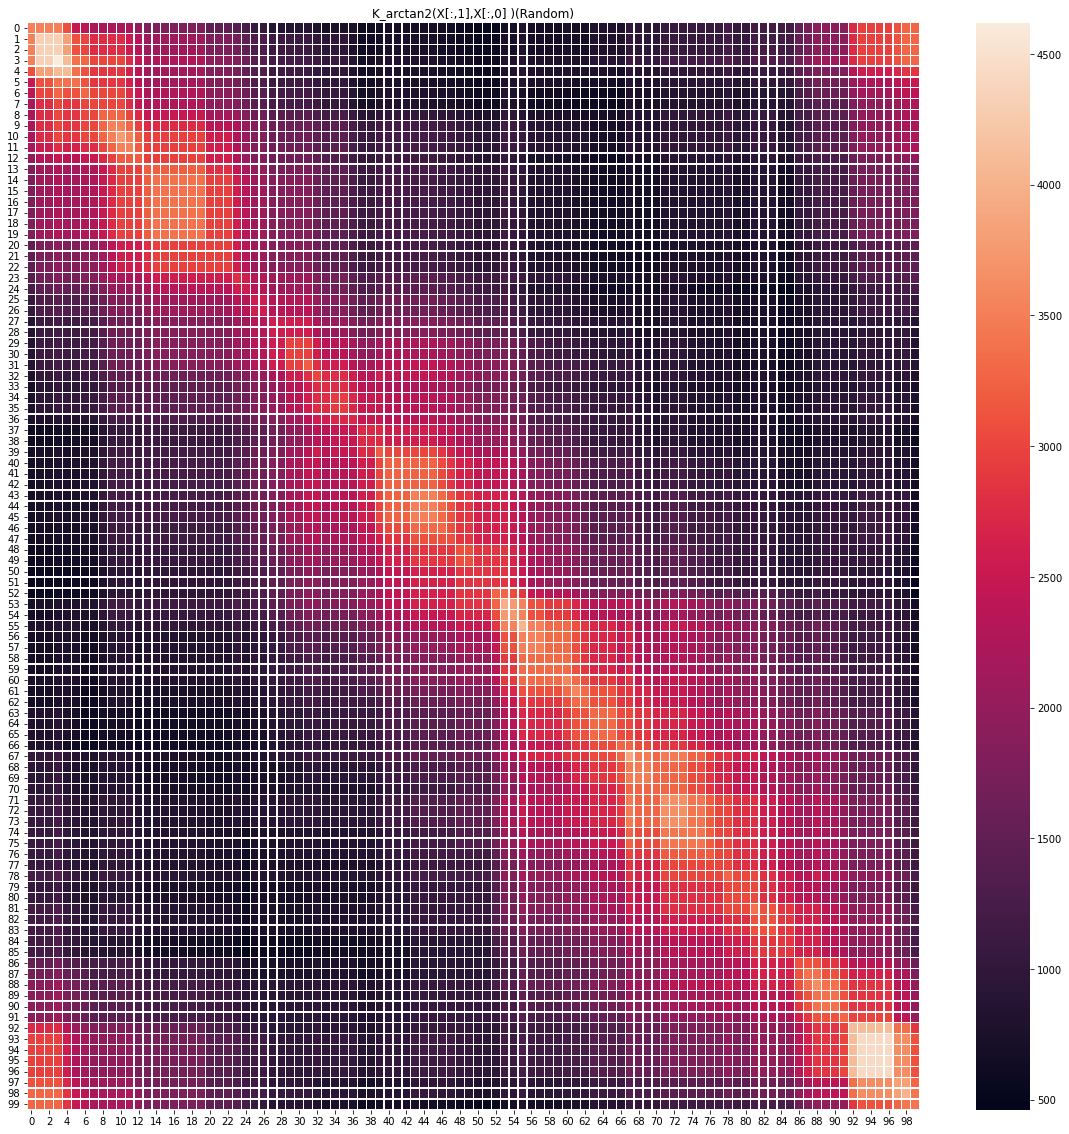

In [131]:
plt.figure(figsize = (20,20))
ax = sns.heatmap(lambda_matrix[0:500:5,0:500:5], linewidth=.2)
plt.title("K_arctan2(X[:,1],X[:,0] )(Random)")
plt.savefig("K_arctan2(X[:,1],X[:,0] )(Random)")
plt.show()

**DLGN-SF(Shallow Features)**


In [92]:
 def apply_gate(beta, idx, npf_features):
  out = beta*(npf_features[idx])
  return out
  
class Gate(nn.Module):
    def __init__(self, beta = 4):
        super(Gate,self).__init__()
        self.beta = beta

    def forward(self, x, idx, npf_features):
      #Soft Relu
      return torch.mul(x,torch.sigmoid(apply_gate(self.beta, idx,npf_features)))

      #Hard Relu
      #return torch.mul(x,torch.sign(npf_features[idx]))

In [93]:
class NPFNeuralNetwork(nn.Module):
    def __init__(self):
        super(NPFNeuralNetwork, self).__init__()
        
        self.fc1 = nn.Linear(2, 32)
        '''
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 128)
        self.fc4 = nn.Linear(128, 128)
        self.fc5 = nn.Linear(128, 128)
        self.fc6 = nn.Linear(128, 10)
        '''
    def forward(self, x):
        x = self.fc1(x)
        '''
        o1 = torch.relu(x)
        x = self.fc2(o1)
        o2 = torch.relu(x)
        x = self.fc3(o2)
        o3 = torch.relu(x)
        x = self.fc4(o3)
        o4 = torch.relu(x)
        x = self.fc5(o4)
        o5 = torch.relu(x)
        x = self.fc6(o5)
        x = F.log_softmax(x, dim=1)
        '''
        return x #, [o1,o2,o3,o4,o5]


In [94]:

class NPVNeuralNetwork(nn.Module):
    def __init__(self):
        super(NPVNeuralNetwork, self).__init__()
  
        self.fc1 = nn.Linear(2, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 32)
        self.fc4 = nn.Linear(32, 32)
        self.fc5 = nn.Linear(32, 1)
        self.gate1 = Gate()
        self.gate2 = Gate()
        self.gate3 = Gate()
        self.gate4 = Gate()
  

    def forward(self, x,npf_features):

        x = self.fc1(x)
        o1 = self.gate1(x, 0, npf_features)
        x = self.fc2(o1)
        o2 = self.gate2(x,1, npf_features)
        x = self.fc3(o2)
        o3 = self.gate3(x,2, npf_features)
        x = self.fc4(o3)
        o4 = self.gate4(x,3, npf_features)
        x = self.fc5(o4)
        return x,  [o1,o2,o3,o4]



In [95]:
def train_decoupled(X1_dataloader,X2_dataloader, npf_models, npv_model, loss_fn, optimizer):
    size = len(X1_dataloader.dataset)
    correct = 0
    for batch, ((X1, y1), (X2,y2)) in enumerate(zip(X1_dataloader, X2_dataloader)):
        X1, y1 = X1.to(device), y1.to(device)
        X2, y2 = X2.to(device), y2.to(device)
        #print(X.shape,y.shape)
        # Compute prediction error
        npf_features = []
        for i in range(4):
          npf_feature = npf_models[i](X1)
          npf_features.append(npf_feature)
        pred, npv_features = npv_model(X2, npf_features)
        #print(pred.shape, y1.shape)
        loss = loss_fn(pred, y1)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #print(npf_model.fc5.weight.grad)
        
        if batch%100 == 0:
            #correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            loss, current = loss.item(), batch * len(X1)
            print(f"loss: {loss:>7f} Batch:{batch} [{current:>5d}/{size:>5d}]")
    return pred

def test_decoupled(dataloader, npf_models, npv_model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    for i in range(len(npf_models)):
      npf_models[i].eval()
    npv_model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for batch, (X, y) in enumerate(dataloader):
          X, y = X.to(device), y.to(device)
          npf_features = []
          for i in range(4):
            npf_feature = npf_models[i](X)
            npf_features.append(npf_feature)
          pred, npv_features = npv_model(X, npf_features)
          test_loss += loss_fn(pred, y).item()
          correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

    return pred, npv_features

In [96]:
npf_model1 = NPFNeuralNetwork().to(device)
npf_model2 = NPFNeuralNetwork().to(device)
npf_model3 = NPFNeuralNetwork().to(device)
npf_model4 = NPFNeuralNetwork().to(device)

npf_models = [npf_model1,npf_model2,npf_model3,npf_model4]
npv_model = NPVNeuralNetwork().to(device)

In [97]:
#npv_model.load_state_dict(npf_model.state_dict())
#npf_model.load_state_dict(model.state_dict())

In [98]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam([{'params': npf_model1.parameters()},
                              {'params': npf_model2.parameters()},
                              {'params': npf_model3.parameters()},
                              {'params': npf_model4.parameters()},
                              {'params': npv_model.parameters()}], lr=3e-2)


In [99]:
#for param in npf_model.parameters():
 # param.requires_grad = False

In [100]:
epochs = 200
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    pred = train_decoupled(train_dataloader,train_dataloader,npf_models, npv_model, loss_fn, optimizer)
    test_decoupled(train_dataloader,npf_models, npv_model, loss_fn)
    test_decoupled(test_dataloader,npf_models, npv_model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.561836 Batch:0 [    0/  450]
Test Error: 
 Accuracy: 0.0%, Avg loss: 0.291940 

Test Error: 
 Accuracy: 0.0%, Avg loss: 0.286703 

Epoch 2
-------------------------------
loss: 0.273387 Batch:0 [    0/  450]
Test Error: 
 Accuracy: 0.0%, Avg loss: 0.260021 

Test Error: 
 Accuracy: 0.0%, Avg loss: 0.432353 

Epoch 3
-------------------------------
loss: 0.209015 Batch:0 [    0/  450]
Test Error: 
 Accuracy: 0.0%, Avg loss: 0.263594 

Test Error: 
 Accuracy: 0.0%, Avg loss: 0.292007 

Epoch 4
-------------------------------
loss: 0.267252 Batch:0 [    0/  450]
Test Error: 
 Accuracy: 0.0%, Avg loss: 0.260384 

Test Error: 
 Accuracy: 0.0%, Avg loss: 0.264547 

Epoch 5
-------------------------------
loss: 0.374686 Batch:0 [    0/  450]
Test Error: 
 Accuracy: 0.0%, Avg loss: 0.267358 

Test Error: 
 Accuracy: 0.0%, Avg loss: 0.244506 

Epoch 6
-------------------------------
loss: 0.275215 Batch:0 [    0/  450]
Test Error: 
 Accuracy: 0.0%

In [101]:
prediction, out =  test_decoupled(dataloader,npf_models, npv_model, loss_fn)


Test Error: 
 Accuracy: 0.0%, Avg loss: 0.005106 



In [102]:
temp = np.zeros((3, n_data, 32))
temp[0] = out[0].to("cpu")
temp[1] = out[1].to("cpu")
temp[2] = out[2].to("cpu")

out = temp
out = np.sign(out)

lambda_matrix = np.zeros(shape = (n_data, n_data))

for i in range(n_data):
  for j in range(n_data):
    lambda_matrix[i][j] = np.prod(np.sum(np.multiply(out[:,i,:], out[:,j,:]), axis = 1))

K1 = np.matmul(out[0],out[0].T)
K2 =  np.matmul(out[1],out[1].T)
K3 =  np.matmul(out[2],out[2].T)

lamb =  np.multiply(np.multiply(K1,K2), K3)

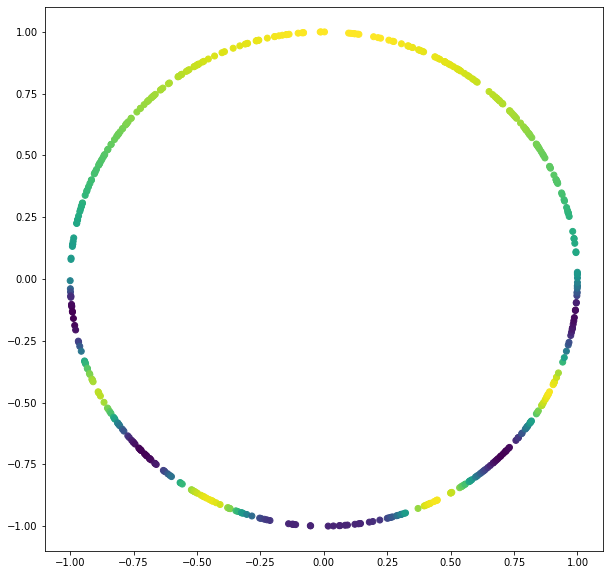

In [103]:
plt.figure(figsize=(10,10))
plt.scatter(X_sorted[:,0], X_sorted[:,1], c = prediction.to("cpu"))
plt.savefig("regenerated")

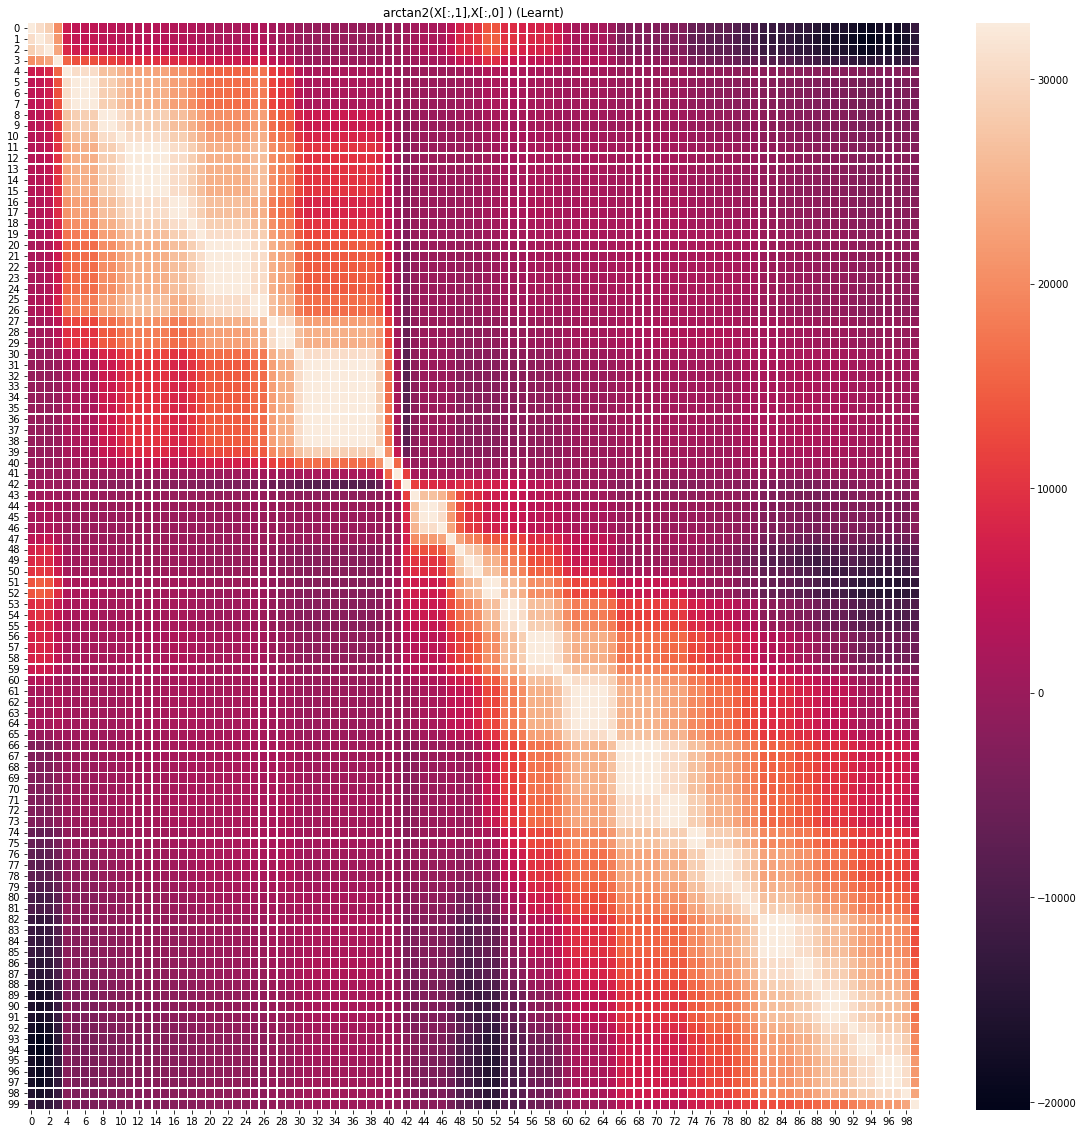

In [104]:
plt.figure(figsize = (20,20))
ax = sns.heatmap(lambda_matrix[0:500:5,0:500:5], linewidth=.2)
plt.title('arctan2(X[:,1],X[:,0] ) (Learnt)')
plt.savefig("arctan2(X[:,1],X[:,0] )(Learnt)")
plt.show()